In [8]:
import pandas as pd
df=pd.read_csv("C:\\Users\hp\Downloads\\SBI_Historical_Data.csv")

In [9]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


In [11]:
df.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


## Data Preprocessing

In [13]:
# Remove columns which are not required in predictions



cols = ['Open','High','Low','Vol.','Change %']
df.drop(cols, axis = 1, inplace = True)
df.head()

,Date,Price
0,"Aug 07, 2020",190.65
1,"Aug 06, 2020",190.95
2,"Aug 05, 2020",191.45
3,"Aug 04, 2020",191.60
4,"Aug 03, 2020",192.25


In [15]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [16]:
df.head()

,Date,Price
0,2020-08-07,190.65
1,2020-08-06,190.95
2,2020-08-05,191.45
3,2020-08-04,191.60
4,2020-08-03,192.25


In [17]:
# Sort the Order Date 
df = df.sort_values('Date')

#print the sorted values
print(df.head(1))

#check any missing values
df.isnull().sum()

           Date  Price
1384 2015-01-01  314.0


Date     0
Price    0
dtype: int64

In [18]:
# grouping sales according to Order Date
df.groupby('Date')['Price'].sum().reset_index()

# min and max values of Order Date
print(df['Date'].min())
print(df['Date'].max())

2015-01-01 00:00:00
2020-08-07 00:00:00


In [19]:
#set 'Order Date' as index
df = df.set_index('Date')
df.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07'],
              dtype='datetime64[ns]', name='Date', length=1385, freq=None)

In [20]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = df['Price'].resample('MS').mean()
y['2017':]

Date
2017-01-01    252.897619
2017-02-01    272.478947
2017-03-01    275.254545
2017-04-01    288.886111
2017-05-01    295.136364
2017-06-01    285.483333
2017-07-01    289.345238
2017-08-01    288.376190
2017-09-01    268.014286
2017-10-01    267.302500
2017-11-01    327.336364
2017-12-01    315.342500
2018-01-01    307.663636
2018-02-01    282.592105
2018-03-01    251.665789
2018-04-01    248.671429
2018-05-01    252.909091
2018-06-01    270.904762
2018-07-01    266.120455
2018-08-01    303.523810
2018-09-01    281.219444
2018-10-01    264.573810
2018-11-01    285.555000
2018-12-01    287.920000
2019-01-01    294.830435
2019-02-01    273.615000
2019-03-01    294.634211
2019-04-01    314.555263
2019-05-01    327.452273
2019-06-01    348.163158
2019-07-01    354.895652
2019-08-01    287.680000
2019-09-01    283.052632
2019-10-01    266.930000
2019-11-01    325.147500
2019-12-01    329.852381
2020-01-01    322.582609
2020-02-01    317.650000
2020-03-01    227.097619
2020-04-01    185.83

## Data Visualization

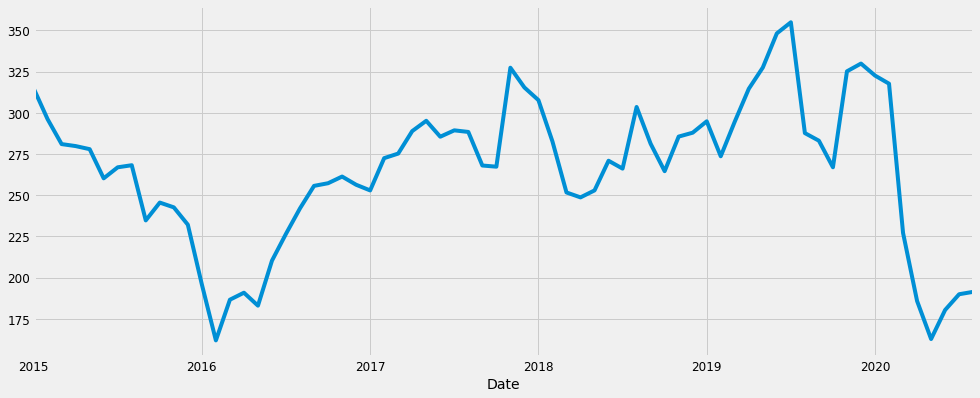

In [22]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
y.plot(figsize = (15, 6))
plt.show()

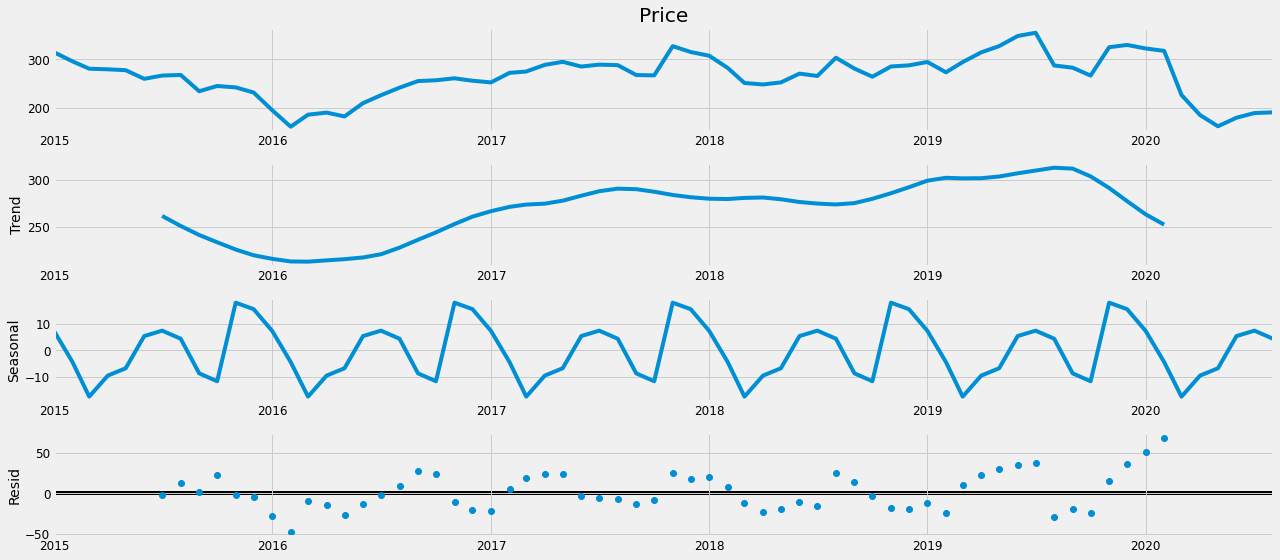

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA model

<p>
    <b><i>About ARIMA model</i></b>
<ul>
    <li>ARIMA stands for <i>Autoregressive Integreted Moving Average</i></li>
    <li>ARIMA models are denoted with the notation <i>ARIMA(p, d, q)</i></li>
    <li>These three parameters account for <i>seasonality, trend, and noise</i> in data</li>
</ul>
</p>

In [24]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:955.8354872626911
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:907.3199175233714
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:638.9607159845987
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:615.733060142164
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:807.685904031137
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:786.2881982534493
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:613.3821056862439


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:615.5709155501977
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:870.5433881177586
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:825.4926233826649
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:591.6297746825571
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:570.819224089813
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:743.962605975479


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:751.0682884981835
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:569.489720826715
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:570.1490948159919
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:616.2104617211114
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:617.655134301979
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:546.4721351867422
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:524.99341699014
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:617.3088604025717
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:617.7627868558008
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:520.23673738702
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:520.312328081357
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:616.739404043499
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:618.2530028082091
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:547.5011530047868
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:526.1396476719825
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:617.9804365049255
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:618.802705414473
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:522.1253718916066
ARIMA(0, 1, 1)x(1, 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:635.2425751744837
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:531.3374941535972
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:530.7721526860402
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:632.5458839713734


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:634.1655715594349
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:557.902605041518
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:535.3673783524141
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:633.8002076592189


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:635.8302311037243
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:532.9513148251052
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:532.0380400309627
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:616.746519408003
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:618.3084542055783
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:547.3173215417838
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:526.0111759844805
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:618.0603429904403
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:618.8842780794919
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:522.1138153318226
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:521.9501713453719
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:618.7230119908345
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:620.2521900388227
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:549.2026316924433
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:527.5115218927641
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:619.9792553748048
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:619.2148693160016
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:524.0668600276814
ARIMA(1, 1,

###### Fitting the ARIMA model

In [26]:

#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8859      0.768      1.154      0.249      -0.619       2.391
ma.L1         -0.8581      0.833     -1.030      0.303      -2.490       0.774
ar.S.L12      -0.7147      0.132     -5.404      0.000      -0.974      -0.455
sigma2       597.0825    112.898      5.289      0.000     375.807     818.358


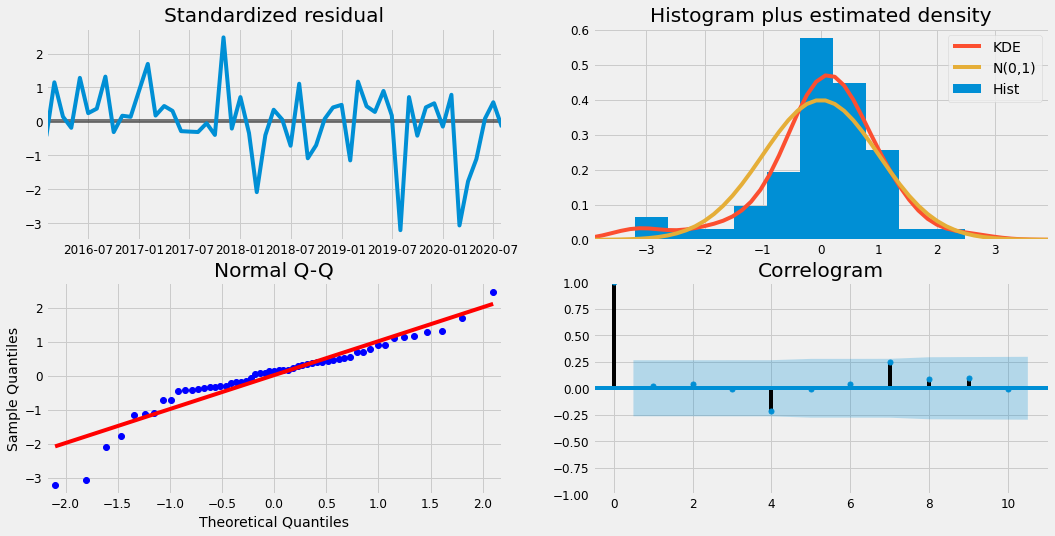

In [27]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

###### Validating Forecasts

In [28]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Price,upper Price
Date,,
2017-01-01,152.759334,289.135365
2017-02-01,183.080860,278.970340
2017-03-01,223.108759,318.970405
2017-04-01,229.865113,325.706337
2017-05-01,239.637853,335.464077
2017-06-01,244.586138,340.401339
2017-07-01,248.772742,344.579837
2017-08-01,248.105532,343.906664
2017-09-01,221.422773,317.219518


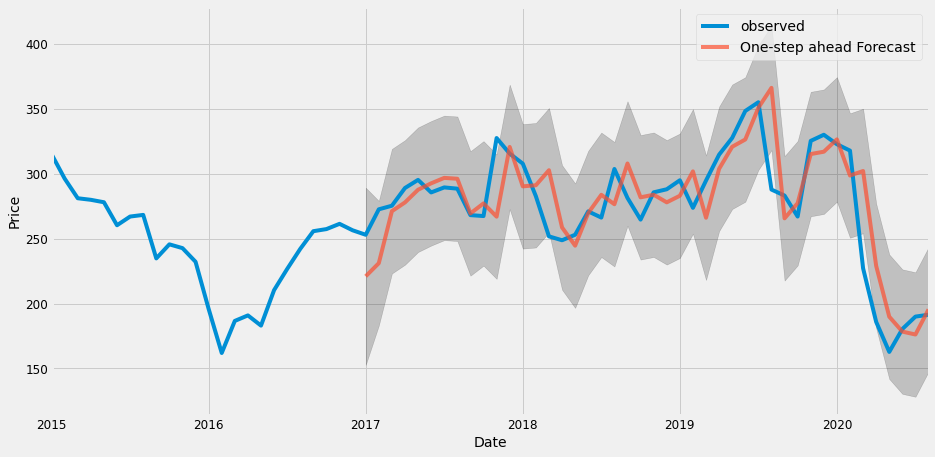

In [33]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Price')
plt.legend()
plt.show()

###### Error Analysis

In [30]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 685.88
The Root Mean Squared Error of our forecasts is 26.19


##### Producing and visualizing forecasts

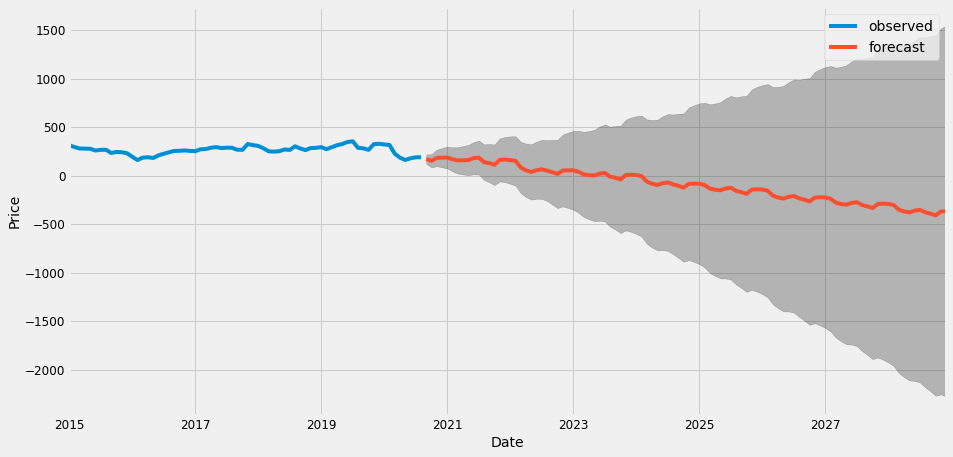

In [32]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

# Checking Stationarity

Null Hypothesis: The series has a unit root (value of a =1)(not stationary)

Alternate Hypothesis: The series has no unit root (stationary)

In [34]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.460279
p-value: 0.125440
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591


# KPSS Test

In [35]:
from statsmodels.tsa.stattools import kpss
from pandas import Series
result = kpss(y)
print('kpss Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

kpss Statistic: 0.141737
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


# Decomposing

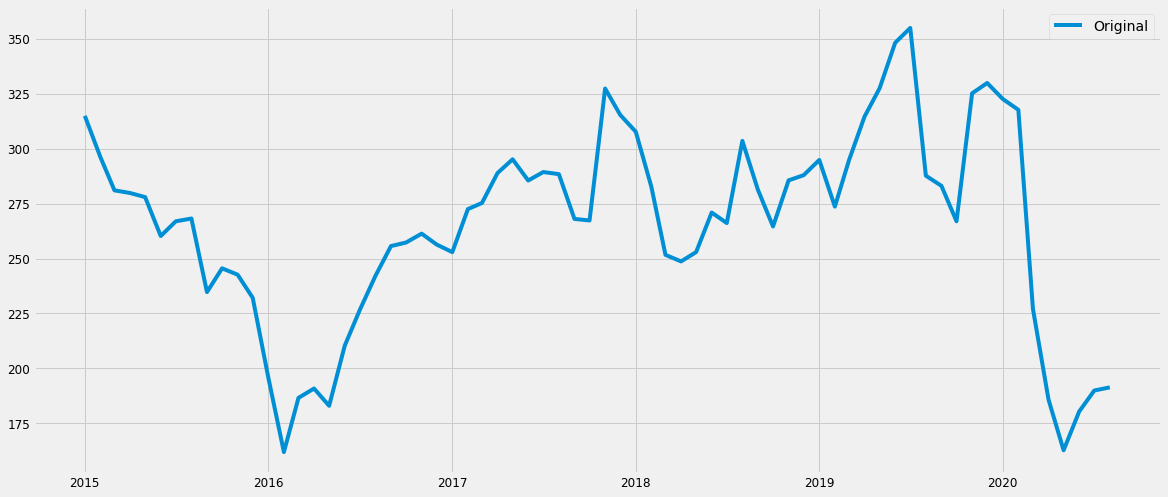

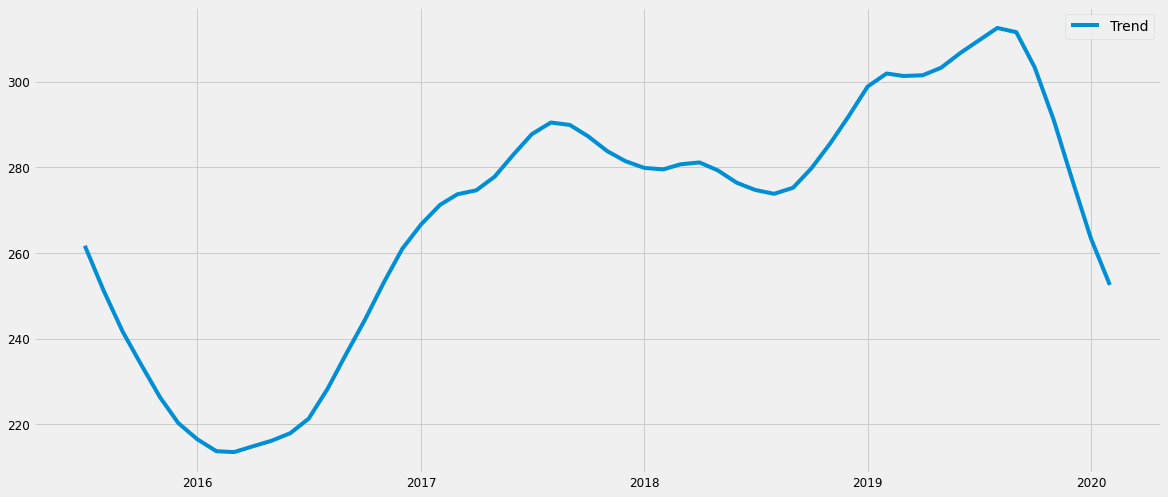

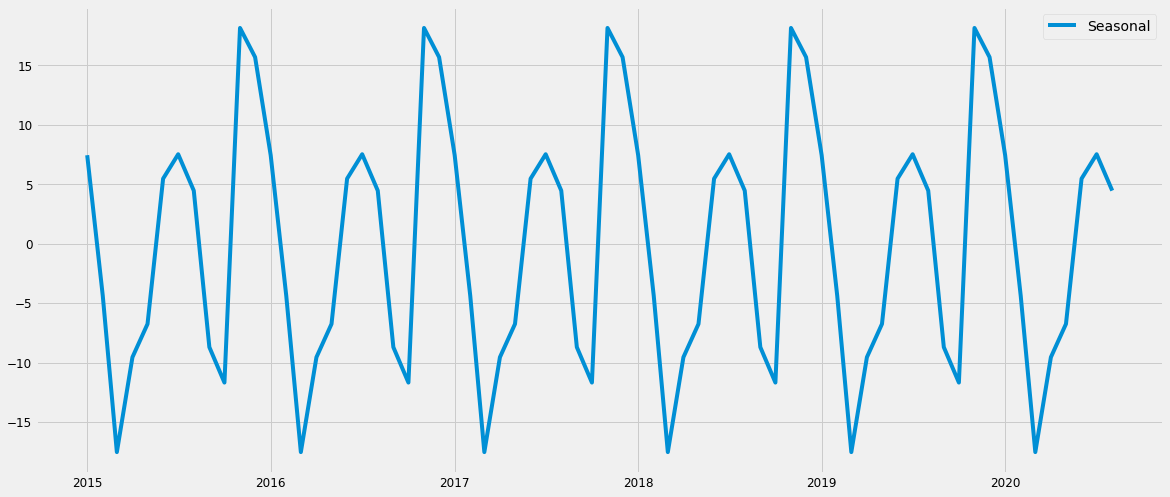

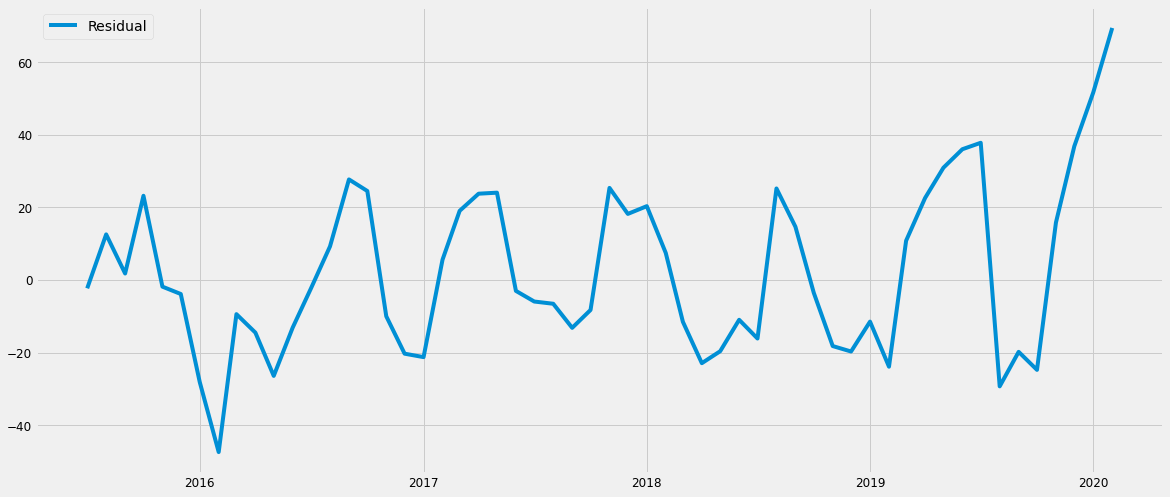

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')